In [6]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz


In [7]:
# 데이터 불러오기
wine = load_wine()


In [10]:
# 데이터 프레임 생성
df = pd.DataFrame(data = wine.data, columns = wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
df['target'] = wine.target

# EDA(Exploratory Data Analysis) 탐색적 데이터 분석
# print(df.shape)
# print(df.describe())
# 
print(df['target'].value_counts())



target
1    71
0    59
2    48
Name: count, dtype: int64


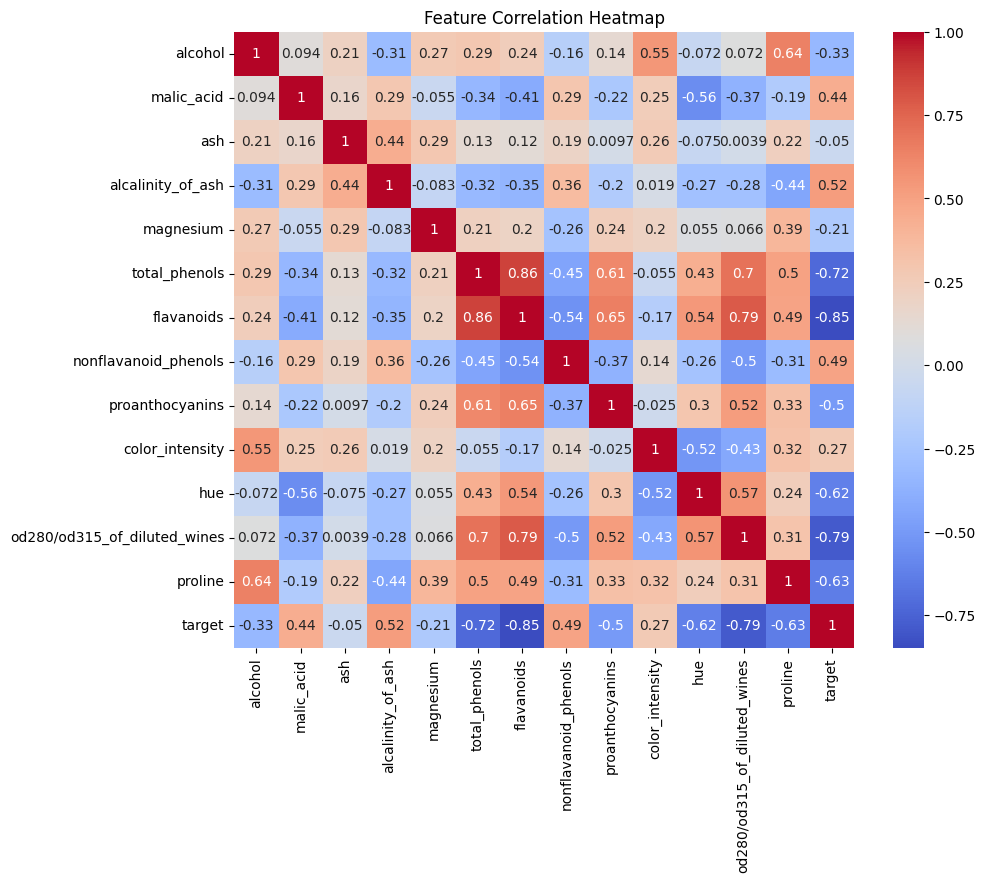

In [19]:
# 특성 간 상관관계 히트맵
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [21]:
# 모형 학습
# 특성 (Feature)와 타겟(target) 의 데이터를 분리
X = df.drop('target', axis = 1)
y = df['target']

In [ ]:
# 학습데이터와 테스트 데이터로 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
# Decision
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [ ]:
# 테스트를 위한 분류
y_pred = clf.predict(X_test)

array([0, 0, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [32]:
# 정확도 계산 및 분류 리포트를 출력
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy:", accuracy)
print("\n Classification Report", classification_report(y_test, y_pred))


 Accuracy: 0.9166666666666666

 Classification Report               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.88      1.00      0.93        14
           2       1.00      0.62      0.77         8

    accuracy                           0.92        36
   macro avg       0.94      0.88      0.89        36
weighted avg       0.93      0.92      0.91        36



In [33]:
# 의사 결정 나무를 시각화
dot_data = export_graphviz(clf, out_file = None)
# Graphviz 객체 생성
graph = graphviz.Source(dot_data)
# 저장 및 표시
graph.render("basic_classifier", view = True)

'basic_classifier.pdf'